In [1]:
import pandas as pd
import statsmodels.stats.api as sms
df = pd.read_csv('/home/truename/Downloads/Test_Data.csv')
df.head()

,Activity,Country,X1,X2,X3,X4,X5,X6,X7,X8,...,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
0,1,Tau,514.112825,280.127163,2043.219975,983.894190,62.264430,407.920959,873.090147,341.502421,...,51.039549,90.502279,794.425537,135.632398,605.175961,399.664283,309.623417,1438.193673,448.423683,1146.551728
1,1,Ofu,502.011480,367.139952,1578.241845,952.498432,153.040439,387.172971,868.124526,361.961562,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,Tau,553.445613,246.669667,1527.881591,1039.902223,32.232777,402.542573,801.059405,345.487249,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,Olosega,493.511261,304.343252,1671.436908,836.613718,132.190120,368.481594,861.582675,343.469353,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,Aunuu,482.213205,428.869497,1538.468529,943.415120,160.019777,369.085979,849.722321,343.343067,...,50.119562,133.679537,813.712626,88.676850,395.318535,333.471865,395.757204,1421.798388,440.439527,1344.631717


    A. Calculate the mean and 95% confidence interval for X2.

In [2]:
conf = sms.DescrStatsW(df.X2).tconfint_mean()
print(f'Mean and 95% confidence interval for X2 are {df.X2.mean()} and {conf}')

Mean and 95% confidence interval for X2 are 312.0242487496403 and (310.47165323060443, 313.57684426867564)


B. Provide a histogram plot of X5 and describe the distribution.

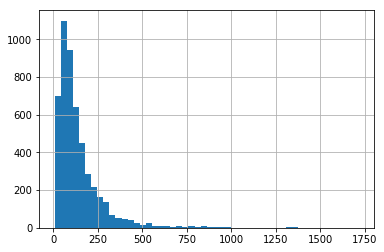

In [4]:
df.X5.hist(bins = 50);

C. Identify the missing values (column names + indices).

In [5]:
null_cols = list(df.isnull().sum(axis=0)[df.isnull().sum(axis=0)>0].index)
[(col, list(df.X3[df.X3.isnull()].index)) for col in null_cols]

[('X3', [2345, 4194, 4798]),
 ('X7', [2345, 4194, 4798]),
 ('X9', [2345, 4194, 4798])]

D. Replace the ‘Country’ column with dummy variables

In [6]:
df.Country.value_counts()

Tau        1500
Ofu        1271
Olosega    1238
Aunuu       991
Name: Country, dtype: int64

In [7]:
df = pd.concat([df,pd.get_dummies(df['Country'], prefix='cntry',dummy_na=True)],axis=1)
df.head()

,Activity,Country,X1,X2,X3,X4,X5,X6,X7,X8,...,X26,X27,X28,X29,X30,cntry_Aunuu,cntry_Ofu,cntry_Olosega,cntry_Tau,cntry_nan
0,1,Tau,514.112825,280.127163,2043.219975,983.894190,62.264430,407.920959,873.090147,341.502421,...,399.664283,309.623417,1438.193673,448.423683,1146.551728,0,0,0,1,0
1,1,Ofu,502.011480,367.139952,1578.241845,952.498432,153.040439,387.172971,868.124526,361.961562,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0
2,1,Tau,553.445613,246.669667,1527.881591,1039.902223,32.232777,402.542573,801.059405,345.487249,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,1,0
3,1,Olosega,493.511261,304.343252,1671.436908,836.613718,132.190120,368.481594,861.582675,343.469353,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1,0,0
4,0,Aunuu,482.213205,428.869497,1538.468529,943.415120,160.019777,369.085979,849.722321,343.343067,...,333.471865,395.757204,1421.798388,440.439527,1344.631717,1,0,0,0,0


In [8]:
df.cntry_nan[df.cntry_nan>0]

Series([], Name: cntry_nan, dtype: uint8)

E. Provide a function that takes an integer and outputs ‘Poker’ if divisible by 3, ‘Stars’ if divisible by 5, and ’Pokerstars’ otherwise.

In [9]:
 def test_game(n):
    if n % 3 == 0:
        return 'Poker'
    if n % 5 == 0:
        return 'Stars'
    return 'Pokerstars'

In [10]:
print(test_game(10))

Stars
